In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
df.shape

(1000, 8)

# 1. Find out how many males and females participated in the test.

In [4]:
df.value_counts('gender')

gender
female    518
male      482
dtype: int64

# 2. What do you think about the students' parental level of education?

In [5]:
df1=df.value_counts('parental level of education').to_frame()
df1

,0
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


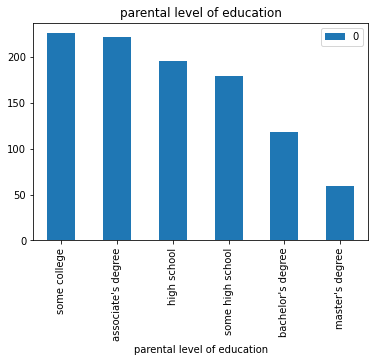

In [6]:
df1.plot(kind='bar')
plt.title('parental level of education')
plt.show()

it can be seen that students parental level of education with master's degree is way less than those who went to some college.

  # 3. Who scores the most on average for math, reading and writing based on 
   # ● Gender  ● Test preparation course

In [7]:
#based on gender

In [8]:
df.groupby('gender')['reading score'].mean()

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [9]:
df.groupby('gender')['math score'].mean()

gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [10]:
df.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

Remark: it can be seen that for math, reading and writing average based on gender, 
female has higher mean in reading score and writing score whereas men scored higher mean in math score

In [11]:
#based on test preparation course

In [12]:
df.groupby('test preparation course')['reading score'].mean()

test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64

In [13]:
df.groupby('test preparation course')['writing score'].mean()

test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64

In [14]:
df.groupby('test preparation course')['math score'].mean()

test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64

Remark: Those who completed the test preperation course has higher mean compared to none in math,reading and writing scores

# 4.What do you think about the scoring variation for math, reading and writing based on
# ● Gender
# ● Test preparation course

In [15]:
#based on test preparation course

In [16]:
df.groupby('test preparation course')['reading score'].var()

test preparation course
completed    183.265864
none         213.419851
Name: reading score, dtype: float64

In [17]:
df.groupby('test preparation course')['writing score'].var()

test preparation course
completed    175.202612
none         226.251739
Name: writing score, dtype: float64

In [18]:
df.groupby('test preparation course')['math score'].var()

test preparation course
completed    210.884027
none         246.668662
Name: math score, dtype: float64

In [19]:
df.groupby('test preparation course')['reading score'].std()

test preparation course
completed    13.537572
none         14.608896
Name: reading score, dtype: float64

In [20]:
df.groupby('test preparation course')['writing score'].std()

test preparation course
completed    13.236412
none         15.041667
Name: writing score, dtype: float64

In [21]:
df.groupby('test preparation course')['math score'].std()

test preparation course
completed    14.521847
none         15.705689
Name: math score, dtype: float64

variation is less for those who completed the test preperation course.
If standard deviation is less then the data is more consistent.

In [22]:
#based on gender

In [23]:
df.groupby('gender')['math score'].var()

gender
female    256.958593
male      211.889097
Name: math score, dtype: float64

In [24]:
df.groupby('gender')['writing score'].var()

gender
female    220.369327
male      202.413924
Name: writing score, dtype: float64

In [25]:
df.groupby('gender')['reading score'].var()

gender
female    207.677438
male      200.211010
Name: reading score, dtype: float64

In [26]:
df.groupby('gender')['math score'].std()

gender
female    16.029928
male      14.556411
Name: math score, dtype: float64

In [27]:
df.groupby('gender')['reading score'].std()

gender
female    14.411018
male      14.149594
Name: reading score, dtype: float64

In [28]:
df.groupby('gender')['writing score'].std()

gender
female    14.844842
male      14.227225
Name: writing score, dtype: float64

the variation of female is higher compared to men.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [29]:
q75 = df['math score'].quantile(q=0.75)
df[df['math score'].ge(q75)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


by calculating the third quartile value we get a value,the top 25% will fall over that value point.
here Q3 of math score is 77.the ones who scored 77 or greater than that value will come under the top 25%.
so here there are 255 students who comes under the top 25% list.